In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [76]:
df1=pd.read_csv('Problem1_data.csv')

In [ ]:
df1.head()

,Unnamed: 0,timestamp,soc,voltage,current
0,0,2021-12-12 04:41:20,87,56.3,0.0
1,1,2021-12-12 04:41:20,87,56.3,0.0
2,2,2021-12-12 04:41:20,87,56.3,0.0
3,3,2021-12-12 04:43:31,87,56.3,0.0
4,4,2021-12-12 04:43:31,87,56.3,0.0


In [ ]:
df1

,Unnamed: 0,timestamp,soc,voltage,current
0,0,2021-12-12 04:41:20,87,56.3,0.0
1,1,2021-12-12 04:41:20,87,56.3,0.0
2,2,2021-12-12 04:41:20,87,56.3,0.0
3,3,2021-12-12 04:43:31,87,56.3,0.0
4,4,2021-12-12 04:43:31,87,56.3,0.0
...,...,...,...,...,...
81135,81135,2021-11-30 04:54:47,95,57.9,0.0
81136,81136,2021-11-30 04:54:47,95,57.8,0.0
81137,81137,2021-11-30 04:56:58,95,57.8,0.0
81138,81138,2021-11-30 04:59:09,95,57.8,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81140 entries, 0 to 81139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  81140 non-null  int64  
 1   timestamp   81140 non-null  object 
 2   soc         81140 non-null  int64  
 3   voltage     81140 non-null  float64
 4   current     81140 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.1+ MB


In [ ]:
df1.describe()

,Unnamed: 0,soc,voltage,current
count,81140.000000,81140.000000,81140.000000,81140.000000
mean,40569.500000,67.109786,53.853164,1.347645
std,23423.244758,24.872373,3.215827,4.148811
min,0.000000,0.000000,0.000000,0.000000
25%,20284.750000,45.000000,50.900000,0.000000
50%,40569.500000,68.000000,53.300000,0.000000
75%,60854.250000,94.000000,57.500000,0.000000
max,81139.000000,100.000000,58.600000,67.100000


In [ ]:
df1.shape

(81140, 5)

In [ ]:
df1.isnull().sum()

Unnamed: 0    0
timestamp     0
soc           0
voltage       0
current       0
dtype: int64

There are no null values in the dataset

In [77]:
df1=df1.drop(['Unnamed: 0'],axis=1)

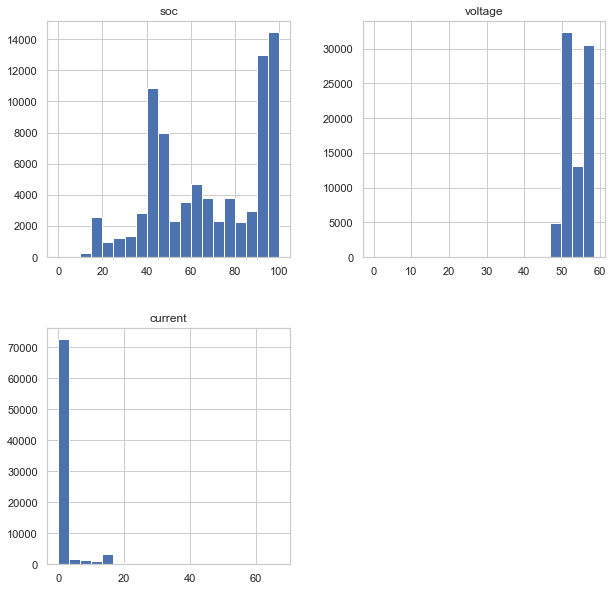

In [ ]:
df1.hist(bins=20,figsize=(10,10))
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


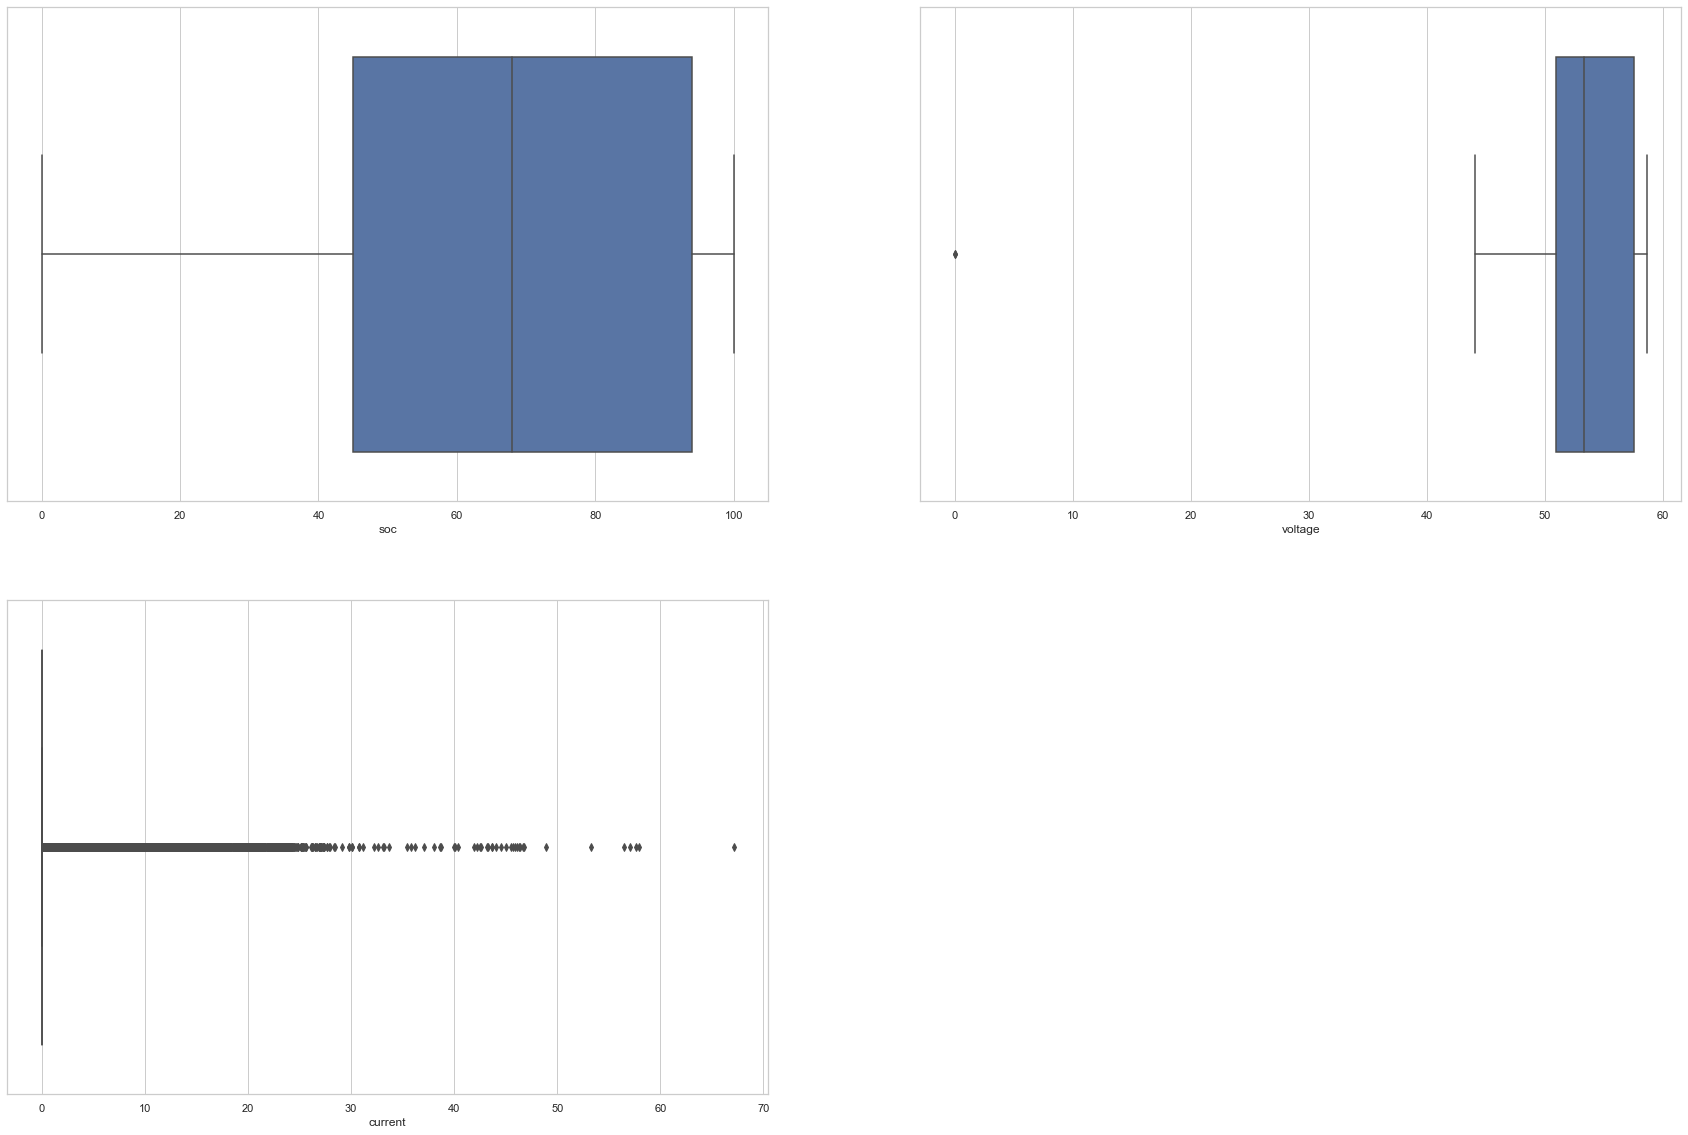

In [ ]:
features=['soc'	,'voltage'	,'current']
plt.subplots(figsize=(30,20))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)  #Creates a subplot grid with 4 rows and 3 columns (total of 12 subplots).
  #i+1 specifies the position of the current subplot (starting from 1).

  sb.boxplot(df1[col])
plt.show()

From the boxplot, it is evident that the current column contains outliers

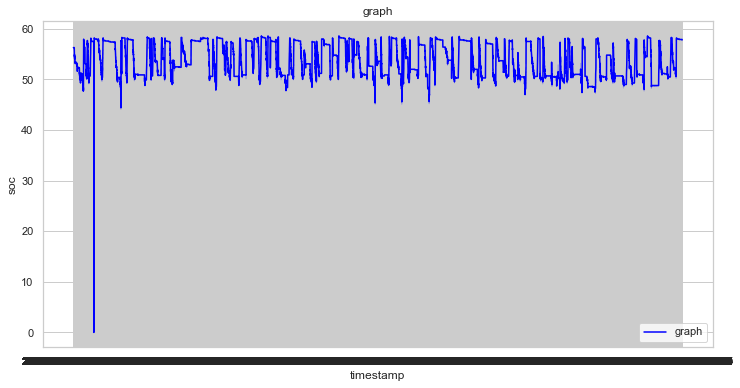

In [31]:
# Assuming df is your DataFrame
sb.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sb.lineplot(data=df1, x='timestamp', y='voltage', label='graph', color='blue')

# Adding labels and title
plt.xlabel('timestamp')
plt.ylabel('soc')
plt.title('graph')

plt.show()


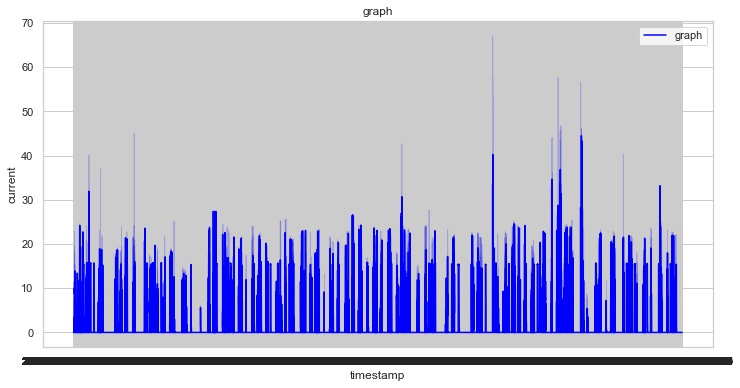

In [ ]:
# Assuming df is your DataFrame
sb.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sb.lineplot(data=df1, x='timestamp', y='current', label='graph', color='blue')

# Adding labels and title
plt.xlabel('timestamp')
plt.ylabel('current')
plt.title('graph')  

plt.show()

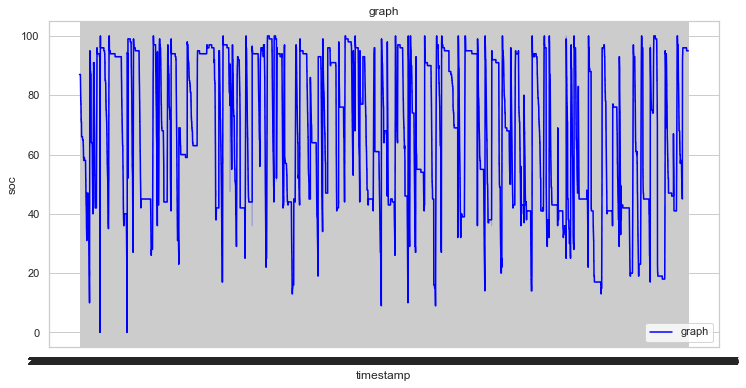

In [34]:
# Assuming df is your DataFrame
sb.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sb.lineplot(data=df1, x='timestamp', y='soc', label='graph', color='blue')

# Adding labels and title
plt.xlabel('timestamp')
plt.ylabel('soc')
plt.title('graph')

plt.show()

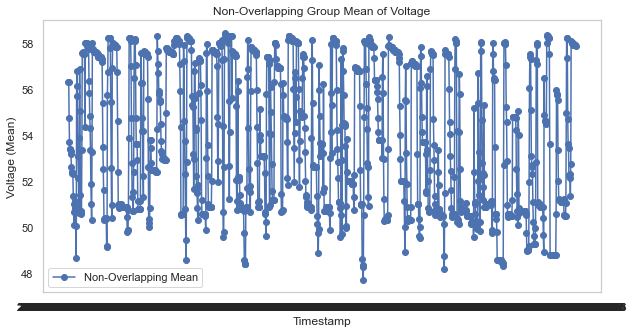

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df1['Group'] = (df1.index // 60)  # Divides rows into groups of 3 (non-overlapping)

# Calculate the mean for each group
grouped_df = df1.groupby('Group', as_index=False).agg({
    'timestamp': 'first',  # Take the first timestamp of the group
    'voltage': 'mean'      # Calculate the mean of Voltage
})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['timestamp'], grouped_df['voltage'], marker='o', label='Non-Overlapping Mean')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (Mean)')
plt.title('Non-Overlapping Group Mean of Voltage')
plt.grid()
plt.legend()
plt.show()


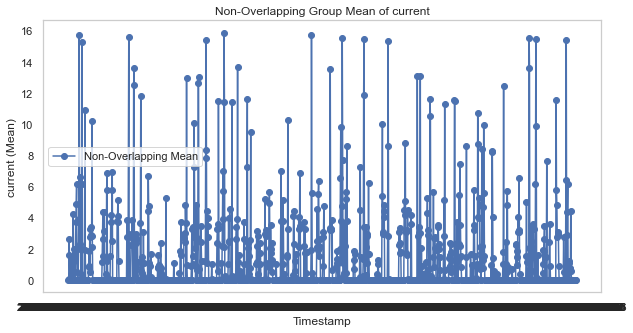

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df1['Group'] = (df1.index // 60)  # Divides rows into groups of 3 (non-overlapping)

# Calculate the mean for each group
grouped_df = df1.groupby('Group', as_index=False).agg({
    'timestamp': 'first',  # Take the first timestamp of the group
    'current': 'mean'      # Calculate the mean of Voltage
})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['timestamp'], grouped_df['current'], marker='o', label='Non-Overlapping Mean')
plt.xlabel('Timestamp')
plt.ylabel('current (Mean)')
plt.title('Non-Overlapping Group Mean of current')
plt.grid()
plt.legend()
plt.show()


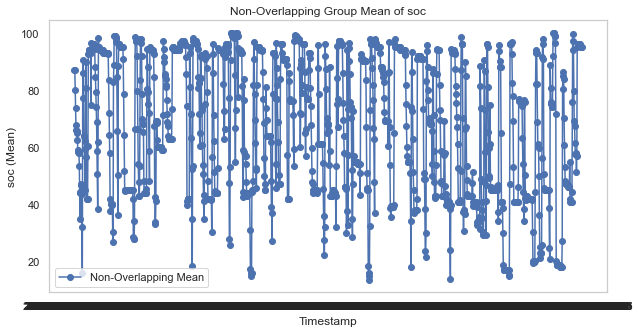

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df1['Group'] = (df1.index // 60)  # Divides rows into groups of 3 (non-overlapping)

# Calculate the mean for each group
grouped_df = df1.groupby('Group', as_index=False).agg({
    'timestamp': 'first',  # Take the first timestamp of the group
    'soc': 'mean'      # Calculate the mean of Voltage
})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['timestamp'], grouped_df['soc'], marker='o', label='Non-Overlapping Mean')
plt.xlabel('Timestamp')
plt.ylabel('soc (Mean)')
plt.title('Non-Overlapping Group Mean of soc')
plt.grid()
plt.legend()
plt.show()

In [78]:
filtered_df = df1[df1['current'] > 30]

# Count the number of such rows
num_timestamps = filtered_df.shape[0]

print(f"Number of timestamps where Current > 30: {num_timestamps}")


Number of timestamps where Current > 30: 46


In [79]:
filtered_df.head()

,timestamp,soc,voltage,current
1968,2022-01-11 13:05:07,49,49.4,40.0
1978,2022-01-11 13:20:24,45,49.1,40.1
3434,2021-12-15 06:16:17,83,53.8,37.1
7998,2021-12-05 10:22:41,53,49.7,45.0
43582,2021-12-22 04:00:16,11,46.4,31.2


In [80]:
filtered_df1 = df1[df1['voltage'] < 45]
num_timestamps = filtered_df1.shape[0]
print(f"Number of timestamps where voltage < 45: {num_timestamps}")

Number of timestamps where voltage < 45: 4


In [81]:
filtered_df1.head()

,timestamp,soc,voltage,current
2657,1970-01-01 00:00:00,0,0.0,0.0
6206,2021-12-30 03:13:27,13,44.1,10.9
6207,2021-12-30 03:13:27,0,44.7,0.0
25801,1970-01-01 00:00:00,0,0.0,0.0


In [45]:
df1['timestamp']  # Accesses the timestamp column


0        2021-12-12 04:41:20
1        2021-12-12 04:41:20
2        2021-12-12 04:41:20
3        2021-12-12 04:43:31
4        2021-12-12 04:43:31
                ...         
81135    2021-11-30 04:54:47
81136    2021-11-30 04:54:47
81137    2021-11-30 04:56:58
81138    2021-11-30 04:59:09
81139    2021-11-30 04:59:09
Name: timestamp, Length: 81140, dtype: object

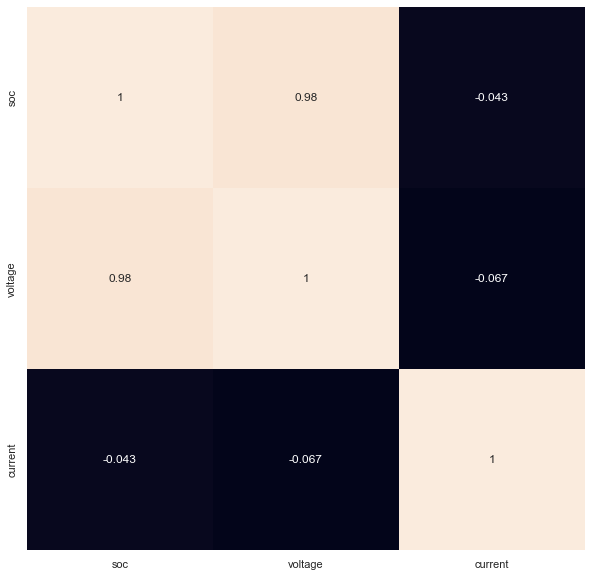

In [83]:
plt.figure(figsize=(10, 10))  
sb.heatmap(df1.corr(),annot=True, cbar=False)
plt.show()

In [84]:


# Check for outliers using the IQR method for 'voltage' and 'current'
Q1 = df1[['voltage', 'current']].quantile(0.25)
Q3 = df1[['voltage', 'current']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df1 = df1[~((df1[['voltage', 'current']] < (Q1 - 1.5 * IQR)) | (df1[['voltage', 'current']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display cleaned data
print(df1.head())


             timestamp  soc  voltage  current
0  2021-12-12 04:41:20   87     56.3      0.0
1  2021-12-12 04:41:20   87     56.3      0.0
2  2021-12-12 04:41:20   87     56.3      0.0
3  2021-12-12 04:43:31   87     56.3      0.0
4  2021-12-12 04:43:31   87     56.3      0.0


In [60]:
# Convert the 'timestamp' column to datetime (if not already)
df1['timestamp'] = pd.to_datetime(df1['timestamp'], errors='coerce')


# Extract date components
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month
df1['day'] = df1['timestamp'].dt.day

# Extract time components
df1['hour'] = df1['timestamp'].dt.hour
df1['minute'] = df1['timestamp'].dt.minute
df1['second'] = df1['timestamp'].dt.second

# Display the first few rows
df1.head()



,Unnamed: 0,timestamp,soc,voltage,current,year,month,day,hour,minute,second
0,0,2021-12-12 04:41:20,87,56.3,0.0,2021,12,12,4,41,20
1,1,2021-12-12 04:41:20,87,56.3,0.0,2021,12,12,4,41,20
2,2,2021-12-12 04:41:20,87,56.3,0.0,2021,12,12,4,41,20
3,3,2021-12-12 04:43:31,87,56.3,0.0,2021,12,12,4,43,31
4,4,2021-12-12 04:43:31,87,56.3,0.0,2021,12,12,4,43,31


In [61]:
import pandas as pd

# Assuming df is your DataFrame and 'soc' is the column you're working with

# Create a new column 'soc_diff' which indicates whether the current value is different from the previous one
df1['soc_diff'] = df1['soc'] != df1['soc'].shift(1)

# Filter the rows where 'soc_diff' is True (i.e., the value is different from the previous one)
df_filtered = df1[df1['soc_diff']]

# Drop the 'soc_diff' column as it's no longer needed
df_filtered = df_filtered.drop(columns=['soc_diff'])

# Print the resulting DataFrame
print(df_filtered)


       Unnamed: 0           timestamp  soc  voltage  current  year  month  \
0               0 2021-12-12 04:41:20   87     56.3      0.0  2021     12   
121           121 2021-12-12 06:54:36   86     56.1      0.0  2021     12   
124           124 2021-12-12 07:14:15   83     55.1      6.8  2021     12   
127           127 2021-12-12 07:20:48   82     55.0      2.6  2021     12   
131           131 2021-12-12 07:25:11   81     55.1      0.0  2021     12   
...           ...                 ...  ...      ...      ...   ...    ...   
80398       80398 2021-11-29 13:13:15   92     58.1      3.8  2021     11   
80403       80403 2021-11-29 13:15:26   93     58.1      2.9  2021     11   
80409       80409 2021-11-29 13:28:33   94     58.2      1.3  2021     11   
80422       80422 2021-11-29 14:18:47   96     58.1      0.0  2021     11   
80921       80921 2021-11-30 00:39:12   95     57.9      0.0  2021     11   

       day  hour  minute  second  
0       12     4      41      20  
121  

In [62]:
print(df_filtered['soc'].unique())


[ 87  86  83  82  81  80  79  78  77  76  75  74  73  72  71  66  65  64
  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47  46
  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29  28
  27  26  25  24  22  21  20  19  18  17  16  15  14  13  12  11  10  67
  68  69  92  94  95  93  91  90  89  88  70  84  85  96   0  98  99 100
  97  23   7   8   9]


In [63]:
print(df_filtered['soc'].value_counts())


88    104
93    102
87    101
94    101
90    101
     ... 
12      4
0       3
9       2
7       1
8       1
Name: soc, Length: 95, dtype: int64


In [64]:
print(df_filtered[df_filtered['soc'] == 75]['soc'].value_counts())


75    85
Name: soc, dtype: int64
